# Task 7.2: Exploring Relationships

## This script contains the following points:

### 1. Compare different Python libraries for data visualization
### 2. Conduct an exploratory visual analysis to identify relationships between variables

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
# Create folder path
path = r'C:\Users\Thor\OneDrive\Desktop\Career Foundry Tools\Projects\Project 7\Netflix'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','IMDB', 'Movies 2010 clean.csv'))

## I have shortened the list of movies in the data set to those that have come out between the years of 2010-2020 as they have the most info available.

In [5]:
# Removing all values that have a value less than 0
df=df[df['worldwide_gross_income']>0]

In [6]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
df.head()

,imdb_title_id,original_title,year,genre_1,genre_2,genre_3,duration,country,country_2,language,...,description,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics,critical_reception
0,tt4154796,Avengers: Endgame,2019,Action,Adventure,Drama,181,USA,NaN,"English, Japanese, Xhosa, German",...,After the devastating events of,8.4,754786,356000000,858373000,2797800564,78,8869,557,High Praise
1,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,Action,Adventure,Sci-Fi,138,USA,NaN,English,...,"As a new threat to the galaxy rises, Rey, a de...",7.9,845102,245000000,936662225,2068224036,80,4822,909,High Praise
2,tt4154756,Avengers: Infinity War,2018,Action,Adventure,Sci-Fi,149,USA,NaN,English,...,The Avengers and their allies must be willing ...,8.4,796486,321000000,678815482,2048359754,68,4273,611,Average Praise
3,tt0369610,Jurassic World,2015,Action,Adventure,Sci-Fi,124,USA,NaN,English,...,"A new theme park, built on the original site o...",7.0,569512,150000000,652270625,1670401444,59,1537,698,Average Praise
4,tt6105098,The Lion King,2019,Animation,Adventure,Drama,118,USA,UK,"English, Xhosa, Zulu, French, Spanish",...,"After the murder of his father, a young lion p...",6.9,199521,260000000,543638043,1656963790,55,2898,370,Average Praise


In [8]:
df.shape

(3821, 25)

In [9]:
df.describe()

,year,duration,avg_vote,votes,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,3821.000000,3821.000000,3821.000000,3.821000e+03,3.821000e+03,3.821000e+03,3821.000000,3821.000000,3821.000000
mean,2014.409579,106.187909,6.348548,6.612441e+04,2.812822e+07,7.460862e+07,57.231353,237.855535,161.614237
std,2.810694,20.874250,0.875227,1.320544e+05,6.836932e+07,1.874482e+08,16.956176,503.828521,146.841006
min,2010.000000,55.000000,1.400000,1.050000e+02,7.200000e+01,3.980000e+02,1.000000,1.000000,1.000000
25%,2012.000000,94.000000,5.800000,3.286000e+03,4.543100e+04,3.232350e+05,45.000000,24.000000,48.000000
50%,2014.000000,103.000000,6.400000,1.525700e+04,8.417330e+05,5.543036e+06,58.000000,86.000000,118.000000
75%,2017.000000,115.000000,6.900000,6.743600e+04,2.588841e+07,5.507815e+07,70.000000,249.000000,233.000000
max,2020.000000,808.000000,8.800000,2.002816e+06,9.366622e+08,2.797801e+09,100.000000,10472.000000,999.000000


In [10]:
df.dtypes

imdb_title_id              object
original_title             object
year                        int64
genre_1                    object
genre_2                    object
genre_3                    object
duration                    int64
country                    object
country_2                  object
language                   object
director                   object
director_2                 object
writer                     object
production_company         object
actors                     object
description                object
avg_vote                  float64
votes                       int64
budget                     object
usa_gross_income            int64
worldwide_gross_income      int64
metascore                   int64
reviews_from_users          int64
reviews_from_critics        int64
critical_reception         object
dtype: object

In [11]:
#Checking for mixed datatype columns
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

genre_2
genre_3
country_2
language
director_2
writer
production_company
actors
description
budget
critical_reception


In [15]:
#Change data columns to string where possible 
df['genre 2']=df['genre_2'].astype(str)
df['genre 3']=df['genre_3'].astype(str)
df['country']=df['country'].astype(str)
df['country 2']=df['country_2'].astype(str)
df['language']=df['language'].astype(str)
df['director']=df['director'].astype(str)
df['director 2']=df['director_2'].astype(str)
df['writer']=df['writer'].astype(str)
df['production_company']=df['production_company'].astype(str)
df['actors']=df['actors'].astype(str)
df['description']=df['description'].astype(str)
df['budget']=df['budget'].astype(str)
df['year']=df['year'].astype(str)

In [16]:
#Checking for mixed datatype columns
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either

genre_2
genre_3
country_2
director_2
critical_reception


In [17]:
df['worldwide_gross_income']=df['worldwide_gross_income'].astype('int64')
df['usa_gross_income']=df['usa_gross_income'].astype(int)

In [18]:
# Create a correlation matrix using pandas

df.corr()

,duration,avg_vote,votes,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
duration,1.000000,0.315623,0.271658,0.212400,0.225532,0.159908,0.251827,0.281113
avg_vote,0.315623,1.000000,0.370948,0.207018,0.207443,0.657407,0.222510,0.398038
votes,0.271658,0.370948,1.000000,0.714240,0.693818,0.164172,0.673527,0.791991
usa_gross_income,0.212400,0.207018,0.714240,1.000000,0.943717,0.052860,0.672425,0.609854
worldwide_gross_income,0.225532,0.207443,0.693818,0.943717,1.000000,0.043956,0.656973,0.578307
metascore,0.159908,0.657407,0.164172,0.052860,0.043956,1.000000,0.096472,0.273601
reviews_from_users,0.251827,0.222510,0.673527,0.672425,0.656973,0.096472,1.000000,0.648450
reviews_from_critics,0.281113,0.398038,0.791991,0.609854,0.578307,0.273601,0.648450,1.000000


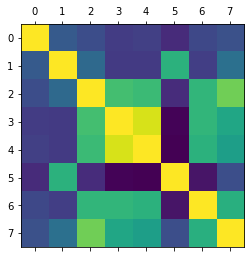

In [19]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

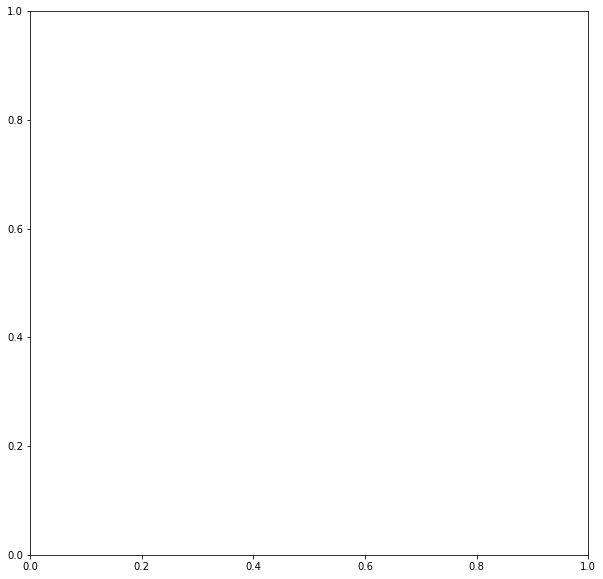

In [20]:
# Create a subplot with matplotlib. What it does is create an empty output, but this is okay—it's just to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [23]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(df.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.


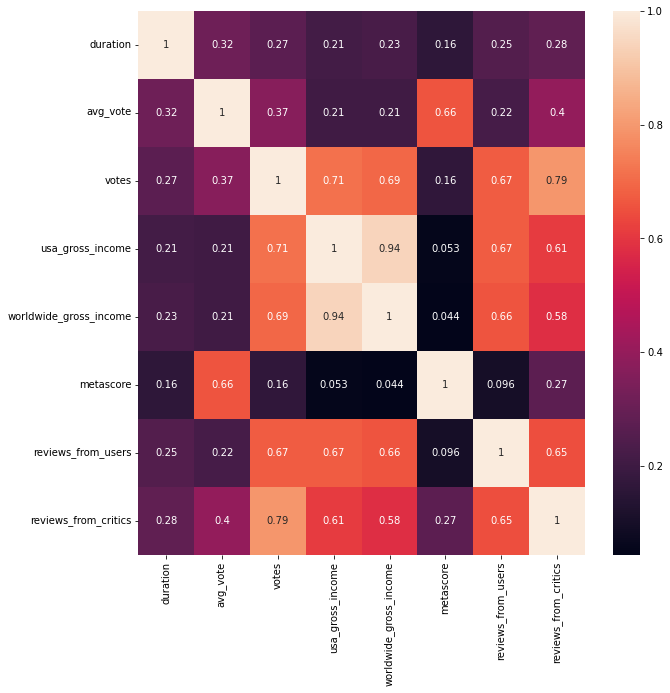

In [24]:
corr.figure

## There are a lot of strong correlations here. Obviously there's a link between US Box Office and Worldwide Box offce, but I'm surprised to see strong correlations between reviews from critics and box office performance.

In [25]:
df['worldwide_gross_income'].describe()

count    3.821000e+03
mean     7.460862e+07
std      1.874482e+08
min      3.980000e+02
25%      3.232350e+05
50%      5.543036e+06
75%      5.507815e+07
max      2.797801e+09
Name: worldwide_gross_income, dtype: float64

In [26]:
df.shape

(3821, 29)

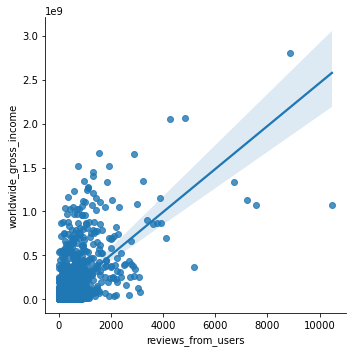

In [27]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'reviews_from_users', y = 'worldwide_gross_income', data = df)

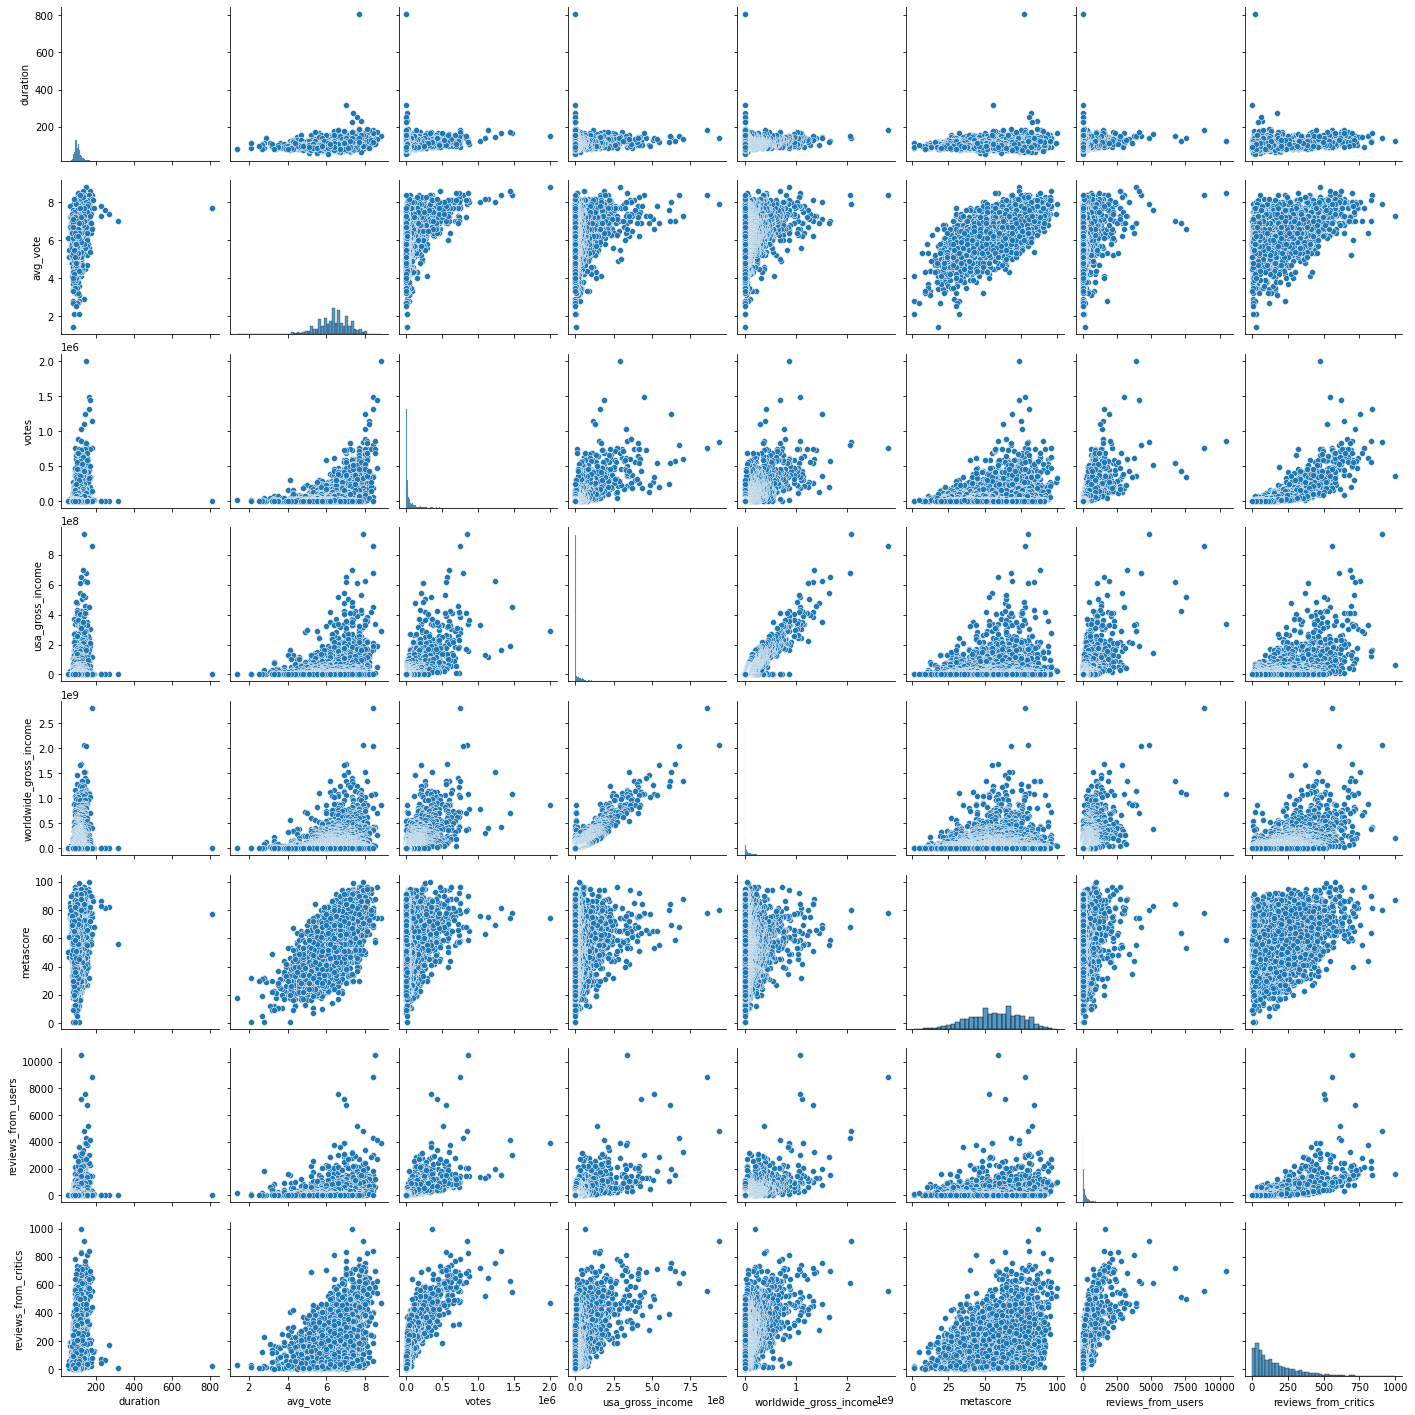

In [28]:
# Create a pair plot 

g = sns.pairplot(df)

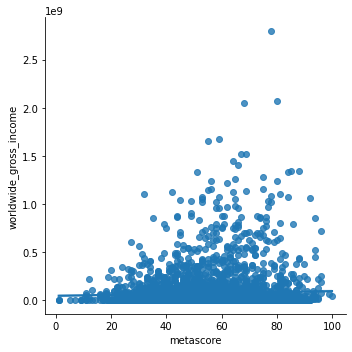

In [29]:
# Create a scatterplot for the "metascore" and "worldwide gross income" columns in seaborn

sns.lmplot(x = 'metascore', y = 'worldwide_gross_income', data = df)

In [30]:
df.dtypes

imdb_title_id              object
original_title             object
year                       object
genre_1                    object
genre_2                    object
genre_3                    object
duration                    int64
country                    object
country_2                  object
language                   object
director                   object
director_2                 object
writer                     object
production_company         object
actors                     object
description                object
avg_vote                  float64
votes                       int64
budget                     object
usa_gross_income            int32
worldwide_gross_income      int64
metascore                   int64
reviews_from_users          int64
reviews_from_critics        int64
critical_reception         object
genre 2                    object
genre 3                    object
country 2                  object
director 2                 object
dtype: object

In [31]:
df['metascore'].describe()

count    3821.000000
mean       57.231353
std        16.956176
min         1.000000
25%        45.000000
50%        58.000000
75%        70.000000
max       100.000000
Name: metascore, dtype: float64

In [32]:
df.loc[df['metascore'] < 45, 'Critical Reception'] = 'Low Praise'
df.loc[(df['metascore'] >= 46) & (df['metascore'] < 70), 'Critical Reception'] = 'Average Praise'
df.loc[df['metascore'] >= 70, 'Critical Reception'] = 'High Praise'

In [33]:
df['Critical Reception'].value_counts()

Average Praise    1862
High Praise        977
Low Praise         916
Name: Critical Reception, dtype: int64

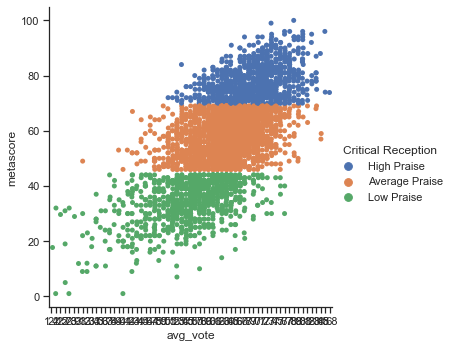

In [34]:
# Categorical plot in seaborn using the Praise category created above

sns.set(style="ticks")
g = sns.catplot(x="avg_vote", y="metascore", hue="Critical Reception", data=df)

## This chart shows that there is a pretty even distribution of movies that were given high praise by both critics and users. 

# Question 7

# Questions from last section: How many titles did countries release in a given year? Did certain countries increase over time while others decreased? What genres proved most popular in given countries? Did they lead to a rise of that genre as a whole? What actors have starred in the most movies?


## Looking at the quesetions from the last section, its clear I will need to update my questions based on the data that can be tested. A lot of it is coming from the correlation between critics reviews and users reviews. I'll be interested in looking at how often critical reception affects user reviews and vice versa. Right now, there appears to be a pretty even distribution between what critics think and what audiences think. 

# Question 8

## Hypothesis: Audiences tend to skew towards critical assessment. If critics like a movie, audiences will like it as well. 

In [36]:
df.head()

,imdb_title_id,original_title,year,genre_1,genre_2,genre_3,duration,country,country_2,language,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,critical_reception
0,tt4154796,Avengers: Endgame,2019,Action,Adventure,Drama,181,USA,nan,"English, Japanese, Xhosa, German",...,After the devastating events of,8.4,754786,356000000,858373000,2797800564,78,8869,557,High Praise
1,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,Action,Adventure,Sci-Fi,138,USA,nan,English,...,"As a new threat to the galaxy rises, Rey, a de...",7.9,845102,245000000,936662225,2068224036,80,4822,909,High Praise
2,tt4154756,Avengers: Infinity War,2018,Action,Adventure,Sci-Fi,149,USA,nan,English,...,The Avengers and their allies must be willing ...,8.4,796486,321000000,678815482,2048359754,68,4273,611,Average Praise
3,tt0369610,Jurassic World,2015,Action,Adventure,Sci-Fi,124,USA,nan,English,...,"A new theme park, built on the original site o...",7.0,569512,150000000,652270625,1670401444,59,1537,698,Average Praise
4,tt6105098,The Lion King,2019,Animation,Adventure,Drama,118,USA,UK,"English, Xhosa, Zulu, French, Spanish",...,"After the murder of his father, a young lion p...",6.9,199521,260000000,543638043,1656963790,55,2898,370,Average Praise


In [37]:
df.to_csv(os.path.join(path, '02 Data', 'Original Data','IMDB', 'Movies 2010 Clean.csv'),index=False)